In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from statistics import median
from scipy.spatial.distance import cdist
import os
import warnings
warnings.filterwarnings('ignore')

duration_data = pd.read_pickle('DataFrames/duration_data_BATSE.dat')
classification = pd.read_csv('DataFrames/classification_BATSE.txt', index_col='GRBname')
group = classification.groupby(classification.type)
batse_short = group.get_group('S')
batse_long = group.get_group('L')
batse_s = [d for d in duration_data.loc[batse_short.index,'T90']]
batse_l = [d for d in duration_data.loc[batse_long.index,'T90']]

path = 'Dropbox/jackson/tsne_maps_batse/'
counts = {grb:[0,0] for grb in pd.read_pickle('non_fft_dataset_BATSE_LC.dat').index}
miscat = []
files_included = 0
#plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.Dark2.colors)

for file in os.listdir(path):
#for i in range(5000):
    #file = f'embedding_TSNE_BATSE{i}.csv'
    if file == 'embedall.csv':
        continue
    emb = pd.read_csv(path+file,header=None,index_col=0)
    long = int(len(emb.groupby(emb.iloc[:,2]).get_group(1)) > len(emb.groupby(emb.iloc[:,2]).get_group(0)))
    emb.iloc[:,2] = emb.replace({long:1,1-long:0}).iloc[:,2]
    cut = classification.loc[emb.index]
    
    group = emb.groupby(emb.iloc[:,2])
    sample_short = group.get_group(0)
    sample_long = group.get_group(1)
    sample_s = [d for d in duration_data.loc[sample_short.index,'T90']]
    sample_l = [d for d in duration_data.loc[sample_long.index,'T90']]
    
    res_s = st.ks_2samp(batse_s,sample_s)
    #res_ad_s = st.anderson_ksamp([batse_s,sample_s])
    res_l = st.ks_2samp(batse_l,sample_l)
    #res_ad_l = st.anderson_ksamp([batse_l,sample_l])
    
    min_dist = cdist(sample_short, sample_long).min()
    short_diff = abs(len(classification.loc[emb.index].groupby(classification.loc[emb.index].type).get_group('S')) - len(sample_short))
    
    if min(res_s.pvalue,res_l.pvalue) < 0.2 or min_dist < 0 or short_diff > 20:
        #fig, axs = plt.subplots(1,3,layout='constrained',figsize=[12,4])
        #fig.suptitle(file, size=16)
        #axs[0].scatter(emb[1],emb[2],s=5,c=emb[3].replace({1: 'C4', 0: 'C1'}),alpha=0.5)
        #axs[0].scatter(emb[1],emb[2],s=5,c=classification.replace({'L': 'C4', 'S': 'C1'}).loc[emb.index].type,alpha=0.5)
        #axs[0].set_title(f'min_dist = {np.round(min_dist,2)}, short_diff = {short_diff}')
        #axs[1].hist(np.log10(duration_data.loc[batse_short.index,'T90']), range = (-3,3), bins = 45, color = 'C1', edgecolor = 'C1', alpha = 0.5)
        #axs[1].hist(np.log10(duration_data.loc[sample_short.index,'T90']), range = (-3,3), bins = 45, color = 'C4', edgecolor = 'C4', alpha = 0.5)
        #axs[1].legend(['BAATSE','Sample'])
        #axs[1].text(-3, 40, "p = {:.3}".format(res_s.pvalue), fontsize=12)
        #axs[1].set_title('short')
        #axs[2].hist(np.log10(duration_data.loc[batse_long.index,'T90']), range = (-1,4), bins = 45, color = 'C1', edgecolor = 'C1', alpha = 0.5)
        #axs[2].hist(np.log10(duration_data.loc[sample_long.index,'T90']), range = (-1,4), bins = 45, color = 'C4', edgecolor = 'C4', alpha = 0.5)
        #axs[2].legend(['BATSE','Sample'])
        #axs[2].text(-1, 90, "p = {:.3}".format(res_l.pvalue), fontsize=12)
        #axs[2].set_title('long')
        #plt.show()
        continue
    
    miscat.append(len(sample_short[~sample_short.index.isin(batse_short.index)])+len(sample_long[~sample_long.index.isin(batse_long.index)]))
    
    for i in range(emb.index.size):
        row = emb.iloc[i]
        counts[str(row.name)][int(row[3])] += 1
    files_included += 1

In [2]:
df = pd.DataFrame(counts).T
df[3] = df.max(axis=1)/df.sum(axis=1)
df.columns = ['S', 'L', '%']
print(f'Number of files included: {files_included}')
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df)

Number of files included: 610


,S,L,%
1009,0,290,1.000000
1025,189,71,0.726923
1036,0,281,1.000000
1039,0,304,1.000000
1042,0,265,1.000000
1046,0,295,1.000000
105,1,285,0.996503
1051,283,0,1.000000
107,0,281,1.000000
1073,257,0,1.000000


In [3]:
display(df[df.loc[:,'%'] < 1])

,S,L,%
1025,189,71,0.726923
105,1,285,0.996503
108,2,283,0.992982
1112,292,4,0.986486
1129,280,2,0.992908
...,...,...,...
845,19,242,0.927203
867,192,93,0.673684
909,291,1,0.996575
974,29,245,0.894161


(array([  14.,   14.,   11.,   16.,   29.,   33.,   29.,   29.,   37.,
        1699.]),
 array([0.50409836, 0.55368852, 0.60327869, 0.65286885, 0.70245902,
        0.75204918, 0.80163934, 0.85122951, 0.90081967, 0.95040984,
        1.        ]),
 <BarContainer object of 10 artists>)

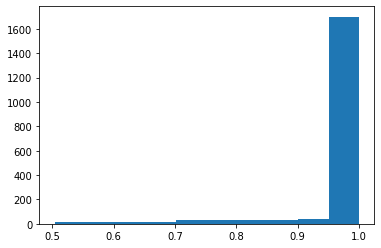

In [4]:
plt.hist(df.loc[:,'%'])

In [5]:
print('proportion of objects below 100% stability: ' + str(round(100*len(df[df.loc[:,'%'] < 1])/len(classification.index), 1)) + '%')
print('proportion of objects below 90% stability: ' + str(round(100*len(df[df.loc[:,'%'] < 0.9])/len(classification.index), 1)) + '%')
print('median percentage of objects that change classification: ' + str(round(100*median(miscat)/900, 1)) + '%')

proportion of objects below 100% stability: 20.6%
proportion of objects below 90% stability: 9.2%
median percentage of objects that change classification: 2.8%


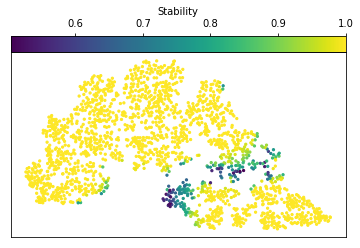

In [6]:
emb_n = pd.read_csv("embedding_TSNE_BATSE.csv", header = None, index_col = 0)
emb_plot = plt.scatter(emb_n[1], emb_n[2], s=5, c=df.loc[:,'%'])
plt.xticks([])
plt.yticks([])
cbar = plt.colorbar(emb_plot, label = 'Stability', location = 'top', pad = 0)
#df.to_pickle('DataFrames/stability_BATSE.dat')
#plt.savefig('stability_BATSE.jpg', dpi=300)